In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [100]:
%matplotlib inline

import gym
import itertools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys

#if "../" not in sys.path:
#  sys.path.append("../") 
sys.path.append("../ReinforcementLearning/reinforcement-learning") 

from collections import defaultdict
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = WindyGridworldEnv()

In [4]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [52]:
discount_factor=1.0
alpha=0.5
epsilon=0.1

In [53]:
Q=defaultdict(lambda: np.zeros(env.action_space.n))

In [54]:
# The policy we're following
policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

In [55]:
nA=env.action_space.n;nA

4

In [56]:
A = np.ones(nA, dtype=float) * epsilon / nA
A

array([0.025, 0.025, 0.025, 0.025])

In [79]:
state = env.reset(); state

30

In [83]:
np.array([env.reset() for i in range(100)])

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])

In [58]:
action_probs = policy(state); action_probs

array([0.925, 0.025, 0.025, 0.025])

In [59]:
[np.random.choice(np.arange(len(action_probs)), p=action_probs) for i in range(10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

In [60]:
action = np.random.choice(np.arange(len(action_probs)), p=action_probs); action

0

In [62]:
# One step in the environment
#for t in itertools.count():
    # Take a step
next_state, reward, done, _ = env.step(action)
next_state, reward, done, _ 

(10, -1.0, False, {'prob': 1.0})

In [63]:
# Pick the next action
next_action_probs = policy(next_state)
next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)

next_action_probs, next_action

(array([0.925, 0.025, 0.025, 0.025]), 0)

In [65]:
Q

defaultdict(<function __main__.<lambda>>,
            {30: array([0., 0., 0., 0.]), 10: array([0., 0., 0., 0.])})

In [64]:
Q[next_state][next_action]

0.0

In [48]:
# TD Update
td_target = reward + discount_factor * Q[next_state][next_action]
td_target

-1.0

In [66]:
td_delta = td_target - Q[state][action]
td_delta 

-1.0

In [67]:
Q[state][action] += alpha * td_delta

In [68]:
Q

defaultdict(<function __main__.<lambda>>,
            {30: array([-0.5,  0. ,  0. ,  0. ]), 10: array([0., 0., 0., 0.])})

In [84]:
num_episodes=1

In [85]:
Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
# Keeps track of useful statistics
stats = plotting.EpisodeStats(
episode_lengths=np.zeros(num_episodes),
episode_rewards=np.zeros(num_episodes))

# The policy we're following
policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

for i_episode in range(num_episodes):
    # Print out which episode we're on, useful for debugging.
    if (i_episode + 1) % 100 == 0:
        print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
        sys.stdout.flush()

    # Reset the environment and pick the first action
    state = env.reset()
    action_probs = policy(state)
    action = np.random.choice(np.arange(len(action_probs)), p=action_probs)

    # One step in the environment
    for t in itertools.count():
        # Take a step
        next_state, reward, done, _ = env.step(action)

        # Pick the next action
        next_action_probs = policy(next_state)
        next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)

        # Update statistics
        stats.episode_rewards[i_episode] += reward
        stats.episode_lengths[i_episode] = t

        # TD Update
        td_target = reward + discount_factor * Q[next_state][next_action]
        td_delta = td_target - Q[state][action]
        Q[state][action] += alpha * td_delta

        if done:
            break

        action = next_action
        state = next_state    

In [86]:
Q

defaultdict(<function __main__.<lambda>>,
            {30: array([-1.78125, -1.25   , -1.3125 , -1.25   ]),
             20: array([-1.6875 , -1.5625 , -1.78125, -1.8125 ]),
             10: array([-1.84375 , -2.265625, -1.8125  , -2.609375]),
             0: array([-2.375  , -1.75   , -2.25   , -2.34375]),
             1: array([-2.203125  , -2.36914062, -2.46875   , -2.390625  ]),
             2: array([-3.0703125 , -3.46875   , -2.85083008, -2.71484375]),
             3: array([-3.87890625, -4.14086914, -3.99243164, -3.58062744]),
             4: array([-3.85351562, -4.16992188, -4.17041016, -4.16442871]),
             5: array([-4.21435547, -4.23828125, -4.54492188, -4.47387695]),
             6: array([-4.68261719, -4.95785522, -5.23681641, -4.63647461]),
             7: array([-4.74822998, -4.74850082, -5.00732422, -4.84204102]),
             8: array([-4.34635162, -4.27279282, -4.80788469, -4.41699219]),
             9: array([-3.81910515, -3.68117905, -3.61151457, -4.17675781])

In [77]:
Q[30]

array([-2.1875   , -2.09375  , -2.4296875, -2.515625 ])

In [87]:
policy(30)

array([0.025, 0.925, 0.025, 0.025])

In [93]:
df_Q=pd.DataFrame(Q, index=['Decision 1','Decision 2','Decision 3','Decision 4']).T
df_Q.sort_index(inplace=True)

In [5]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Lambda time discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [94]:
Q, stats = sarsa(env, 200, alpha=0.5, epsilon=0.1)

Episode 200/200.

In [111]:
df_Q=pd.DataFrame(Q, index=['Direction 1','Direction 2','Direction 3','Direction 4']).T
df_Q.sort_index(inplace=True)

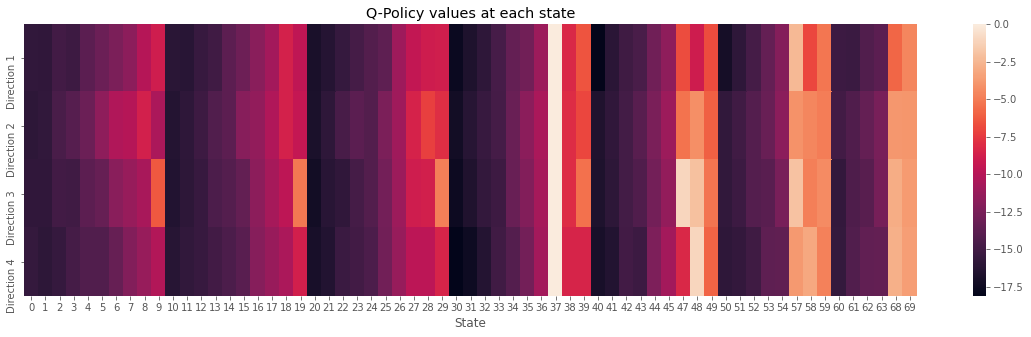

In [113]:
plt.figure(figsize=(20,5))
sns.heatmap(df_Q.T)
plt.title('Q-Policy values at each state')
plt.xlabel('State')
plt.show()

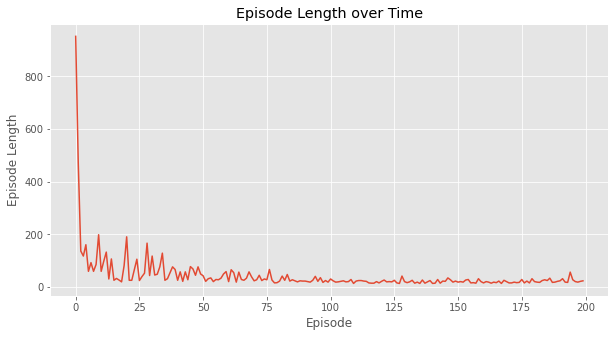

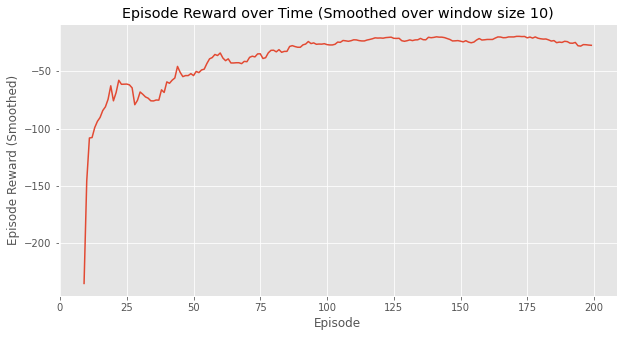

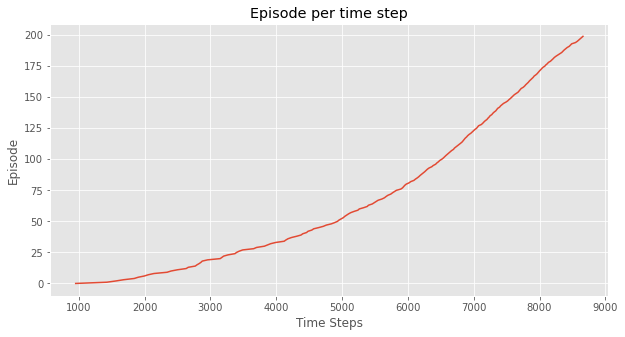

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [7]:
plotting.plot_episode_stats(stats)

Episode 200/200.

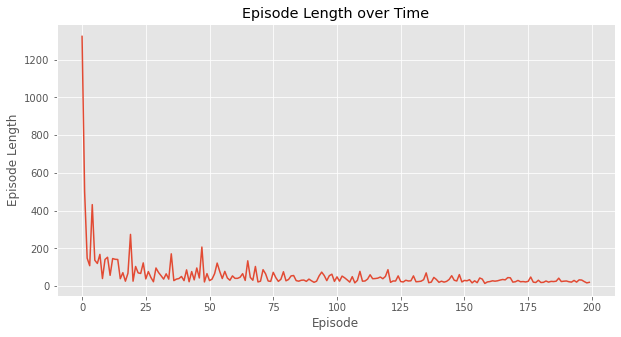

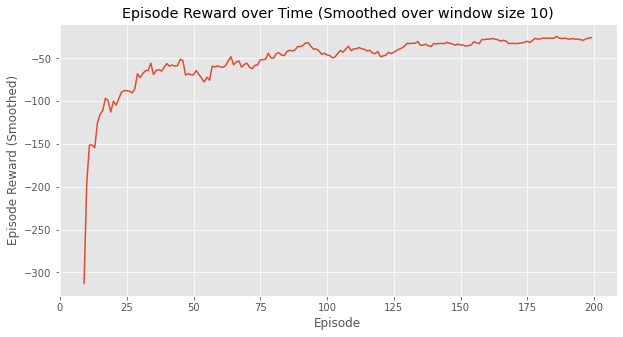

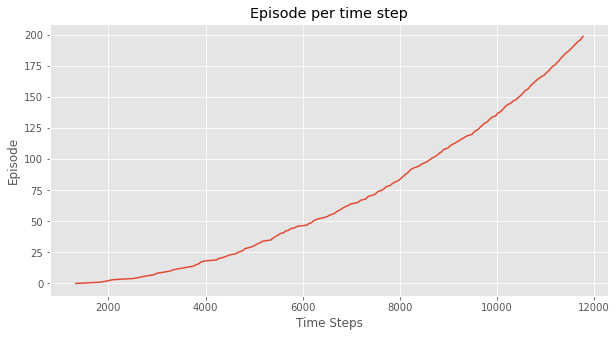

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [114]:
Q, stats = sarsa(env, 200, alpha=0.25, epsilon=0.1)

plotting.plot_episode_stats(stats)

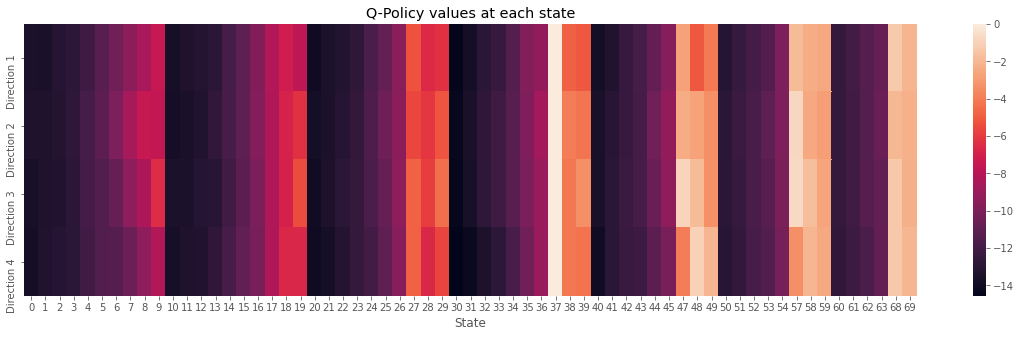

In [115]:
df_Q=pd.DataFrame(Q, index=['Direction 1','Direction 2','Direction 3','Direction 4']).T
df_Q.sort_index(inplace=True)

plt.figure(figsize=(20,5))
sns.heatmap(df_Q.T)
plt.title('Q-Policy values at each state')
plt.xlabel('State')
plt.show()

Episode 200/200.

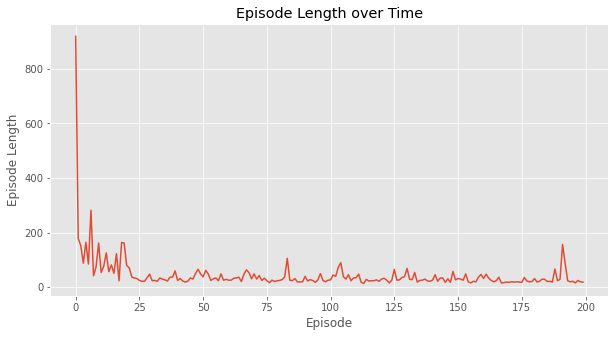

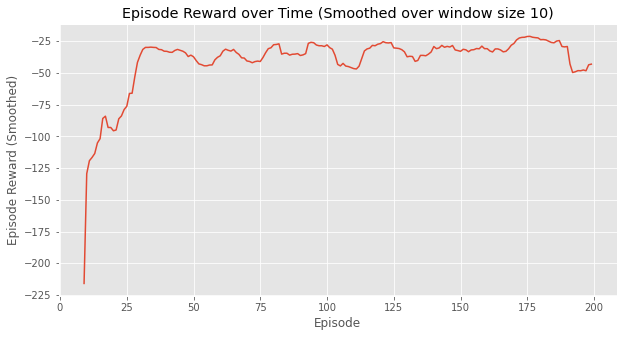

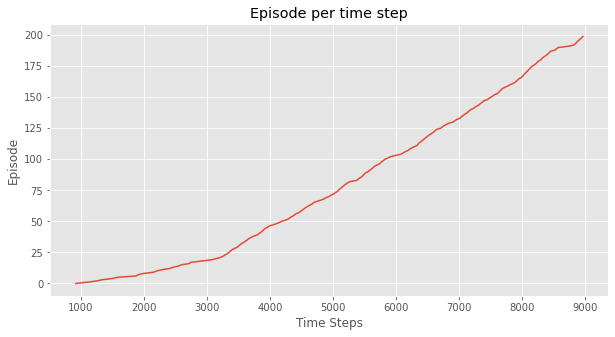

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [116]:
Q, stats = sarsa(env, 200, alpha=0.75, epsilon=0.1)

plotting.plot_episode_stats(stats)

Episode 200/200.

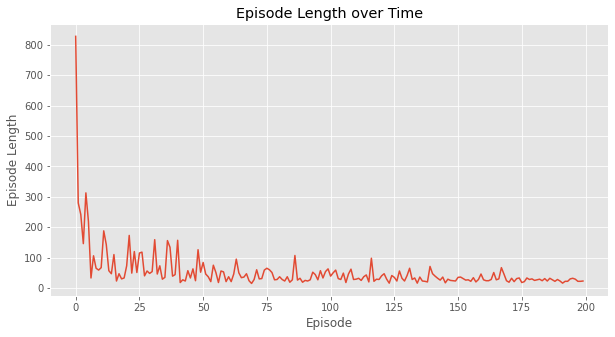

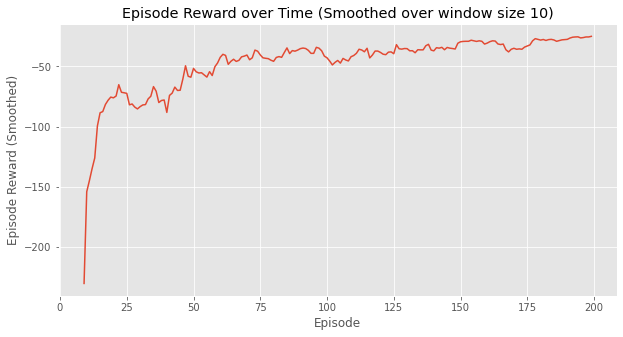

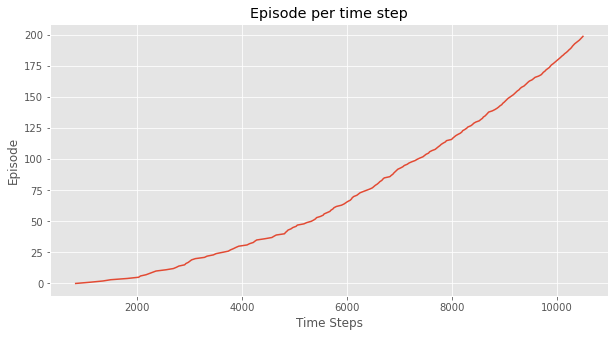

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [117]:
Q, stats = sarsa(env, 200, alpha=0.5, epsilon=0.2)

plotting.plot_episode_stats(stats)

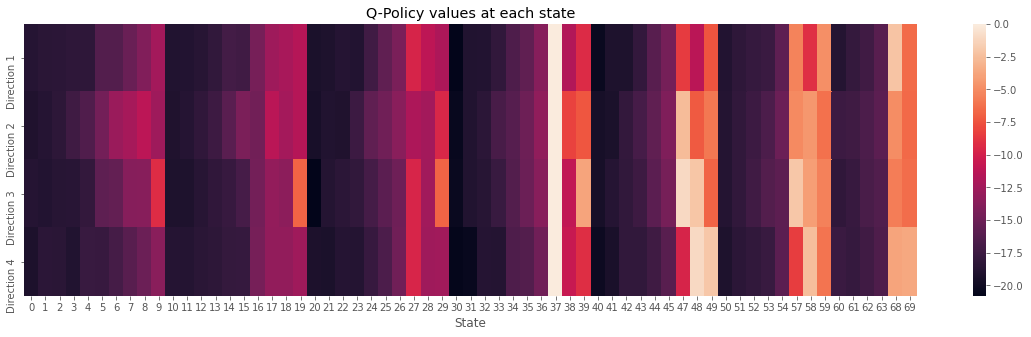

In [118]:
df_Q=pd.DataFrame(Q, index=['Direction 1','Direction 2','Direction 3','Direction 4']).T
df_Q.sort_index(inplace=True)

plt.figure(figsize=(20,5))
sns.heatmap(df_Q.T)
plt.title('Q-Policy values at each state')
plt.xlabel('State')
plt.show()

Episode 200/200.

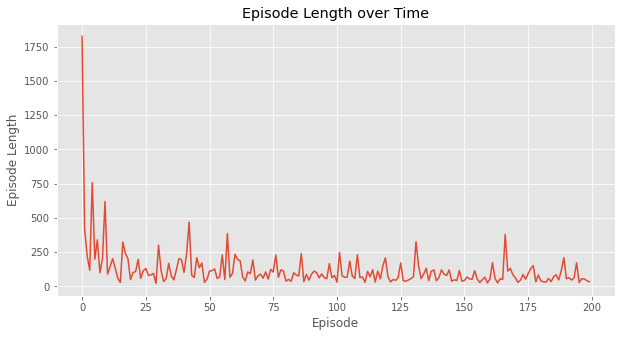

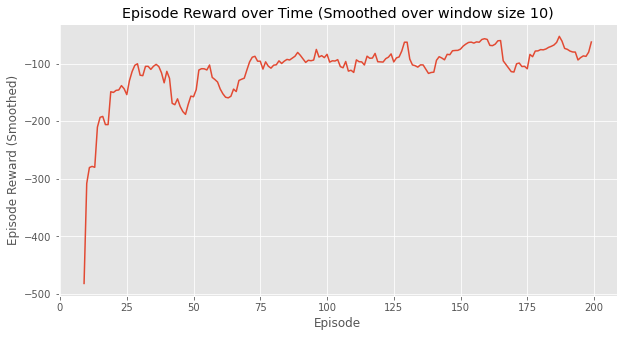

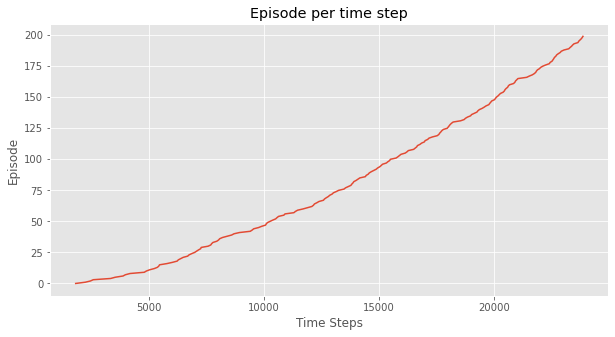

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [119]:
Q, stats = sarsa(env, 200, alpha=0.25, epsilon=0.5)

plotting.plot_episode_stats(stats)

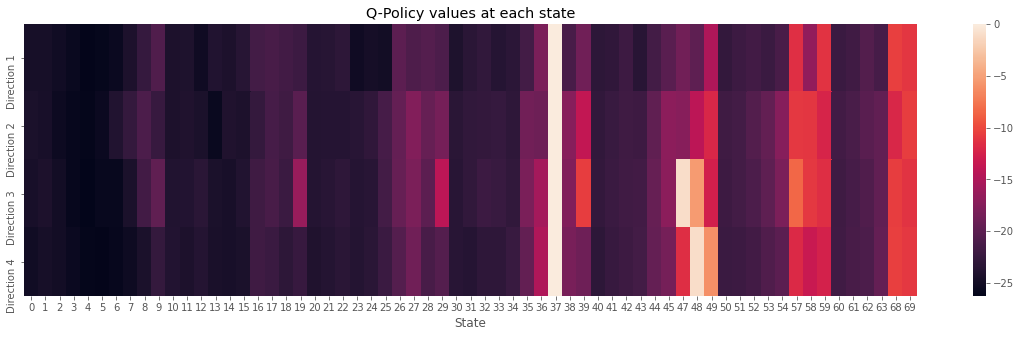

In [120]:
df_Q=pd.DataFrame(Q, index=['Direction 1','Direction 2','Direction 3','Direction 4']).T
df_Q.sort_index(inplace=True)

plt.figure(figsize=(20,5))
sns.heatmap(df_Q.T)
plt.title('Q-Policy values at each state')
plt.xlabel('State')
plt.show()